In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import torch
import torch.nn as nn

In [2]:
df=pd.read_csv("train.csv")

In [3]:
test=pd.read_csv("test.csv")

## Steps
1. Get familiar with data<br>
2. Remove unnecessary columns<br>
3. Deal with missing data<br>
4. Feature engineering<br>
5. Find correleation between features<br>
6. Visualize data
7. Check for outliers
8. Normalize Data
8. Model Building

## Feature Engineering

In [4]:
#df['range_UpperTRange'] = df['MaxOfUpperTRange'] - df['MinOfUpperTRange']

In [5]:
#df['normalized_UpperTRange'] = (df['feature1'] - df['mean_feature1']) / df['range_feature1']

In [6]:
#from pandas_profiling import ProfileReport
#prof=ProfileReport(df)
#prof.to_file(output_file="Info.html")

In [7]:
df.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [9]:
df.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [10]:
df.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

## Notes
1. No null values<br>
2. Every feature is numerical<br>
3. Columns to remove : id
4. No missing data
5. Highly correlated features to target: fruitset(+), seeds(+), fruitmass(+), RainingDays(-), AverageRainingDays(-)
6. Categorical columns:
7. Random Forest and xgb performing good

In [11]:
df.drop("id",axis=1,inplace=True)

In [12]:
test.drop("id",axis=1,inplace=True)

In [13]:
corr_matrix = df.corr().abs()
print(corr_matrix)

                      clonesize  honeybee   bumbles   andrena     osmia  \
clonesize              1.000000  0.304130  0.080433  0.065131  0.007607   
honeybee               0.304130  1.000000  0.017937  0.030671  0.010394   
bumbles                0.080433  0.017937  1.000000  0.164962  0.158001   
andrena                0.065131  0.030671  0.164962  1.000000  0.309556   
osmia                  0.007607  0.010394  0.158001  0.309556  1.000000   
MaxOfUpperTRange       0.016159  0.005840  0.002104  0.013061  0.031391   
MinOfUpperTRange       0.015838  0.005755  0.001813  0.012928  0.030819   
AverageOfUpperTRange   0.016057  0.005892  0.001769  0.012993  0.031415   
MaxOfLowerTRange       0.016343  0.005942  0.001613  0.012924  0.031398   
MinOfLowerTRange       0.016026  0.005809  0.001804  0.013035  0.031486   
AverageOfLowerTRange   0.015987  0.005485  0.001644  0.013071  0.031337   
RainingDays            0.165770  0.046494  0.063294  0.026572  0.079874   
AverageRainingDays     0.

<Axes: >

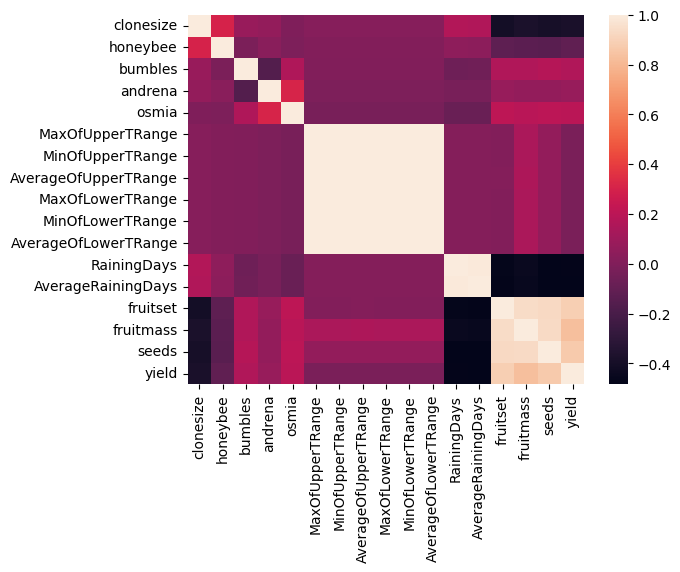

In [14]:
sns.heatmap(df.corr())

In [15]:
df.corr()["yield"].sort_values(ascending=False)

yield                   1.000000
fruitset                0.885967
seeds                   0.868853
fruitmass               0.826481
osmia                   0.198264
bumbles                 0.161145
andrena                 0.073969
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
AverageOfLowerTRange   -0.022081
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
MaxOfUpperTRange       -0.022517
honeybee               -0.118001
clonesize              -0.382619
RainingDays            -0.477191
AverageRainingDays     -0.483870
Name: yield, dtype: float64

## Visualizing Data

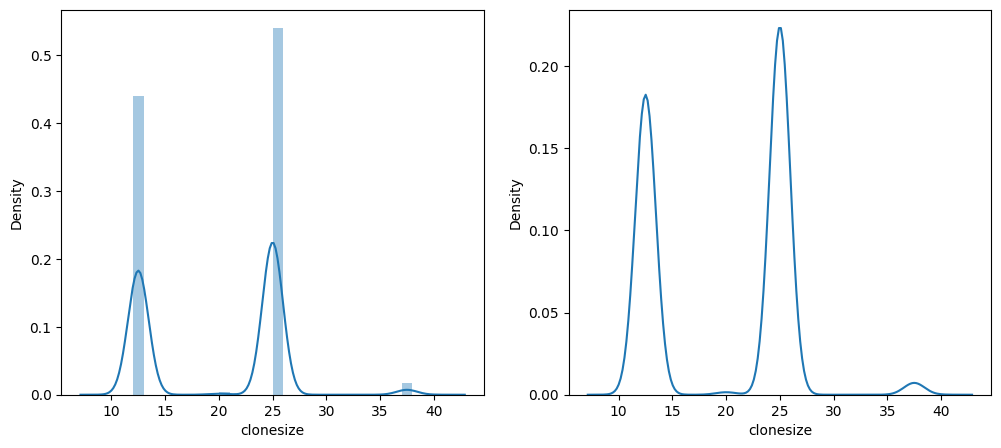

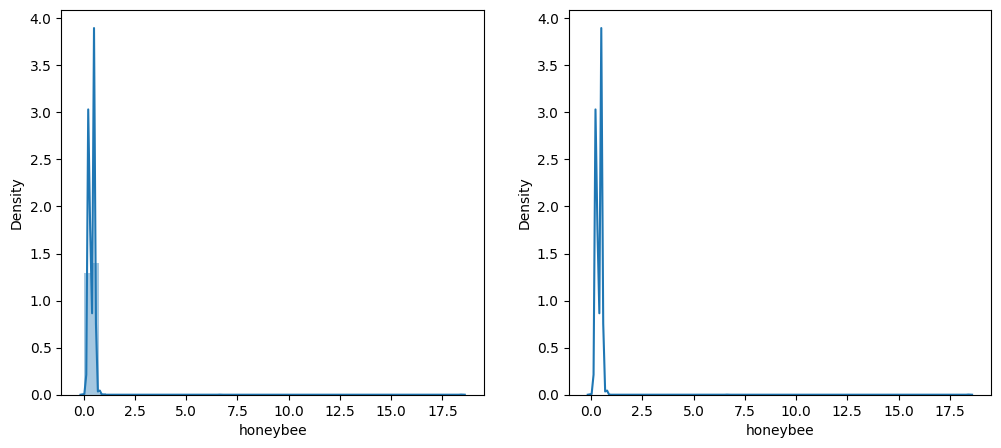

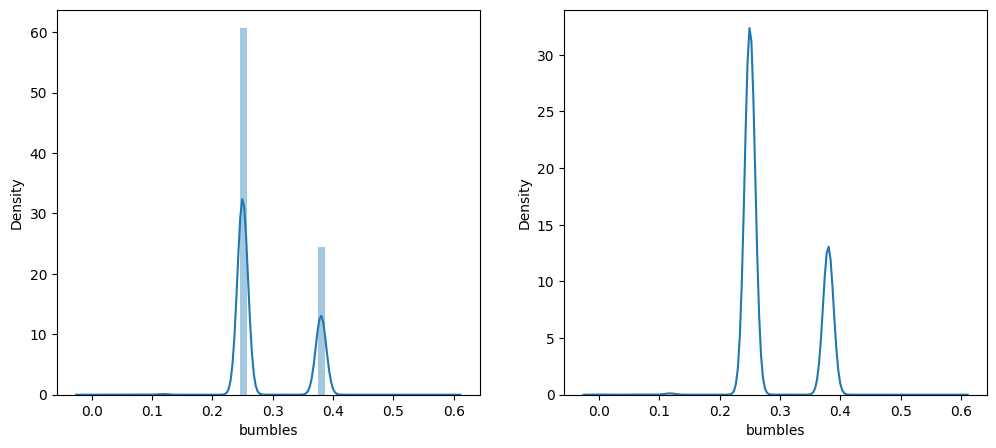

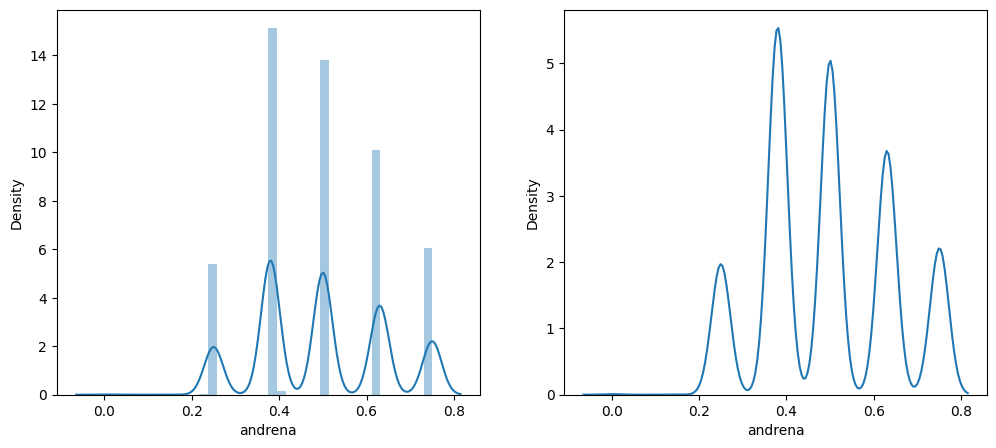

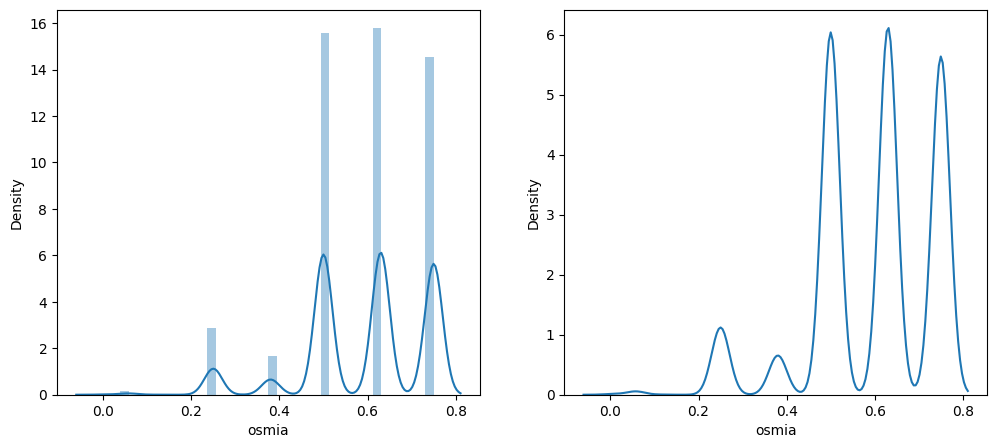

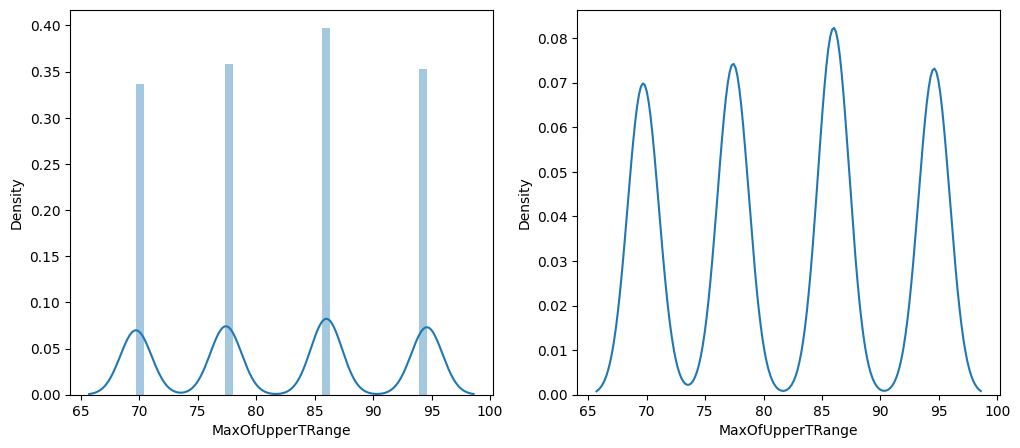

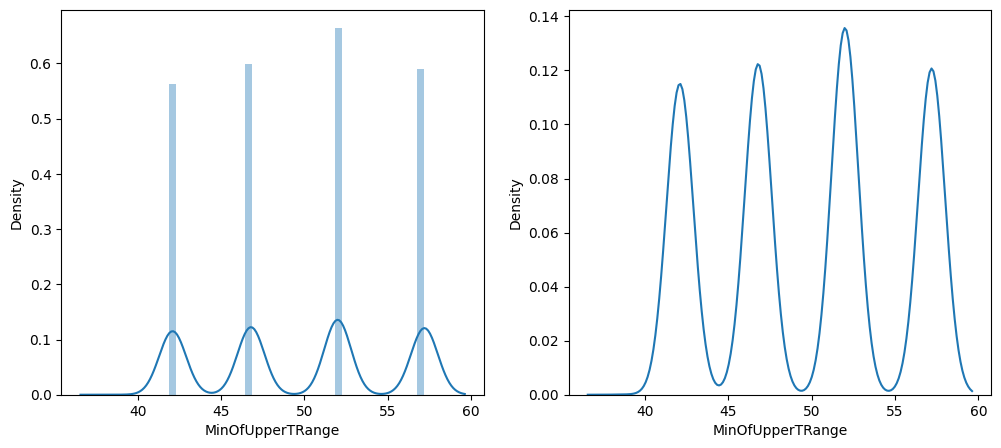

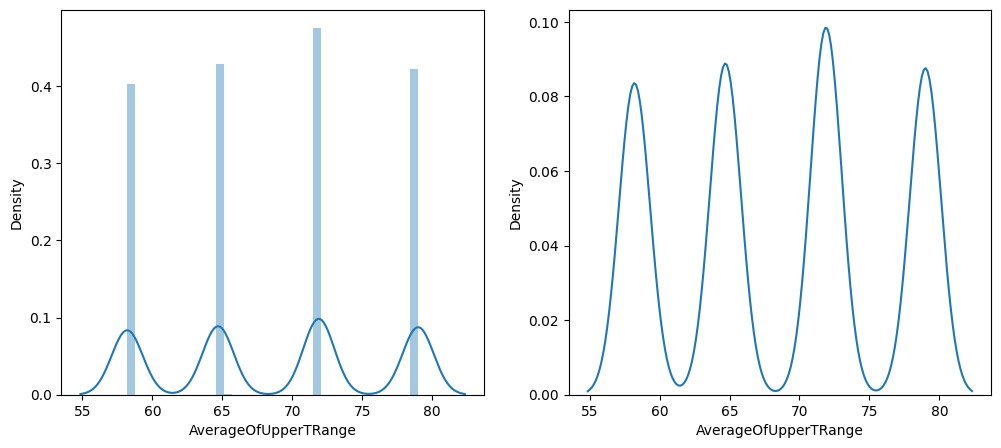

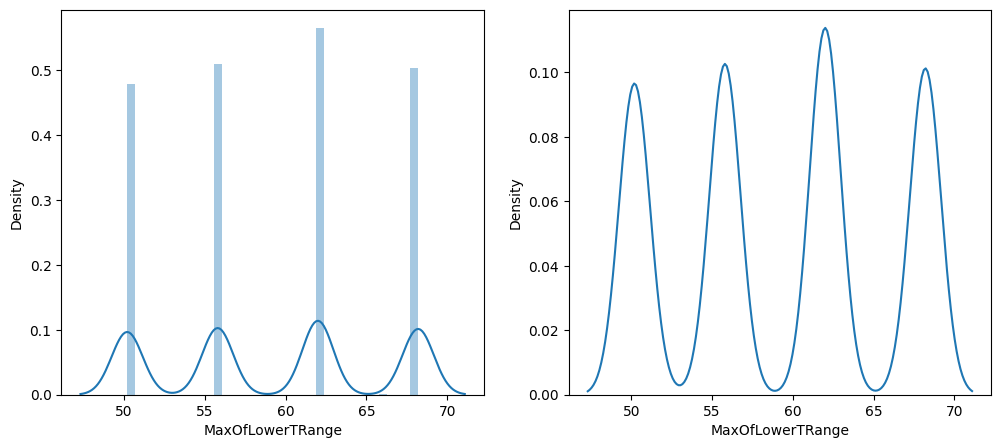

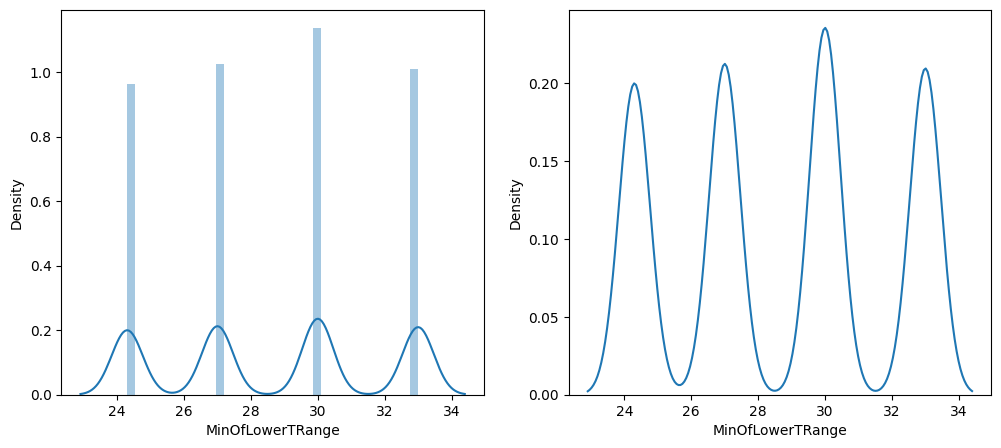

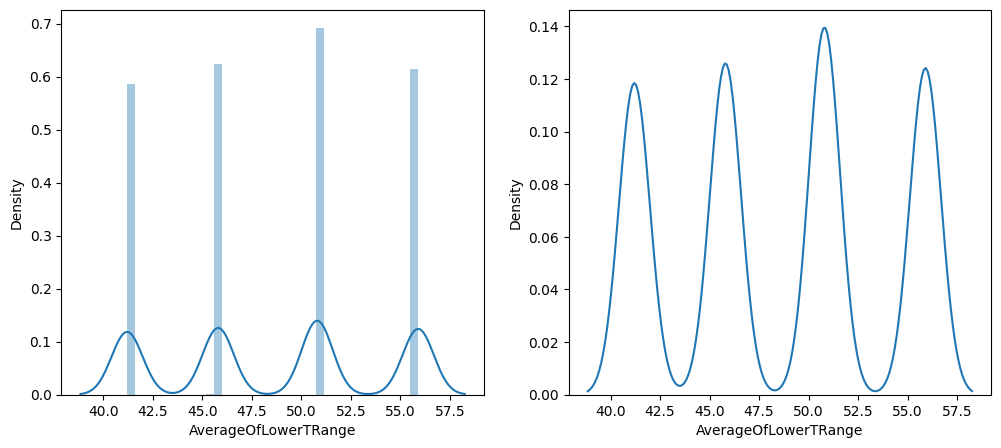

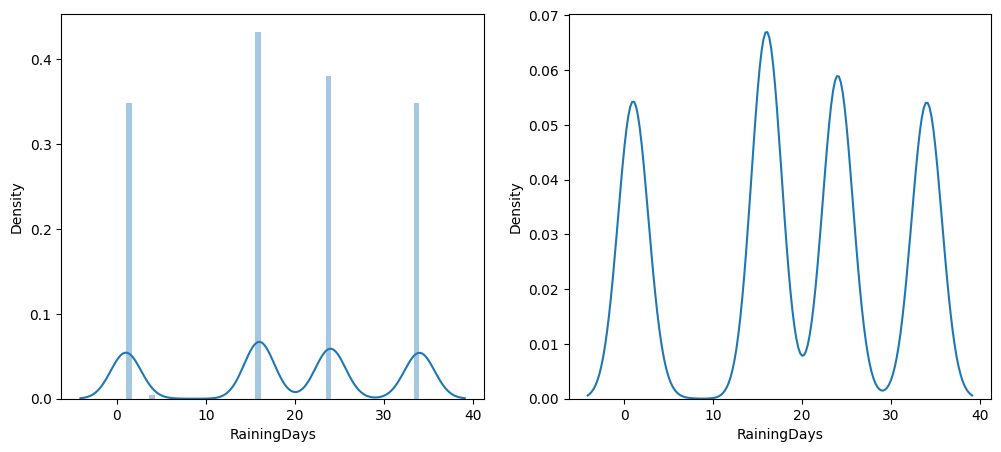

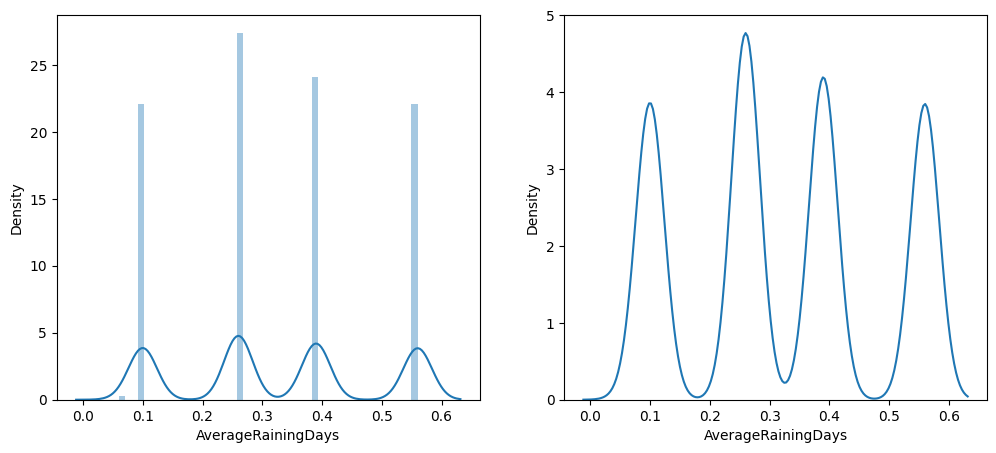

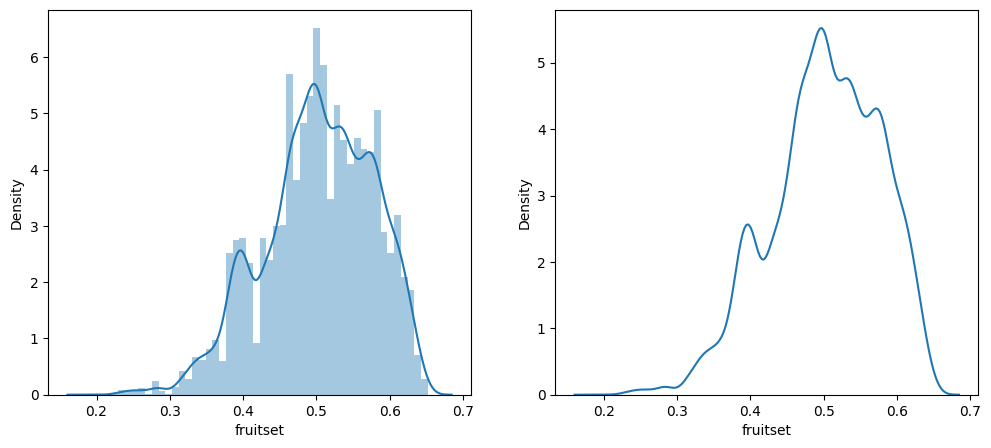

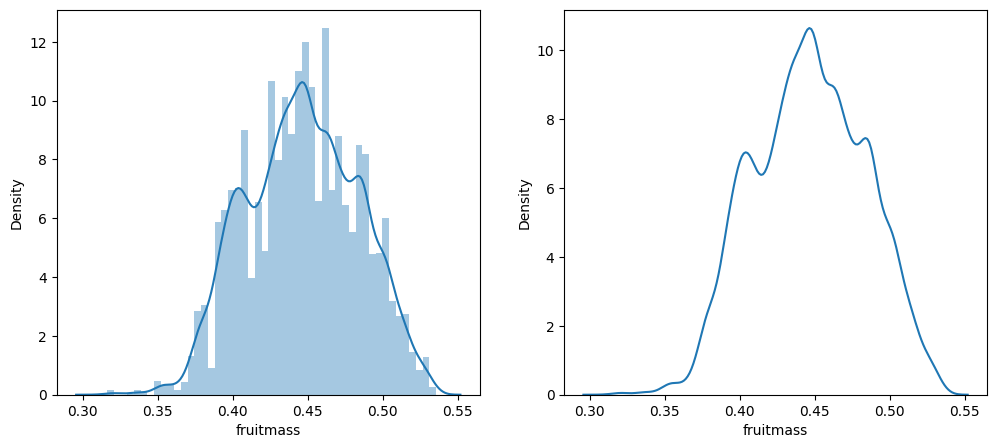

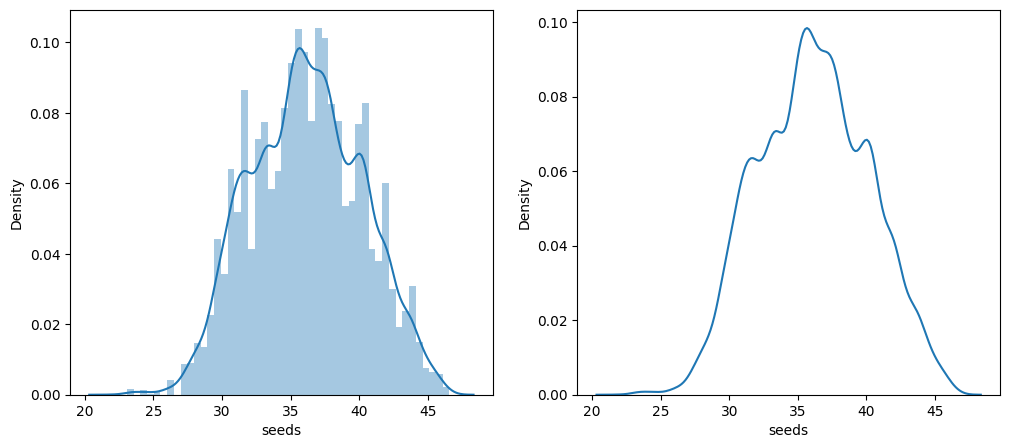

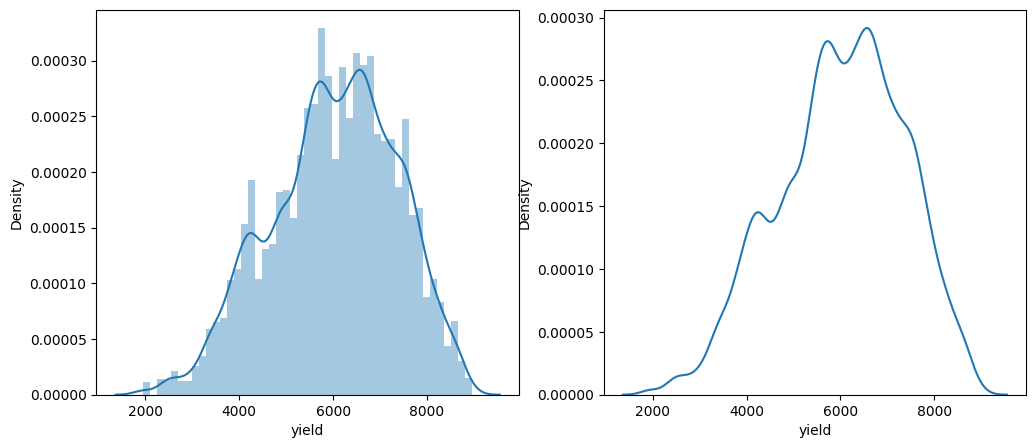

In [16]:
for column in df.columns:
    f,axes=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(df[column],ax=axes[0])
    sns.kdeplot(df[column],ax=axes[1])

In [17]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

<Axes: xlabel='seeds', ylabel='yield'>

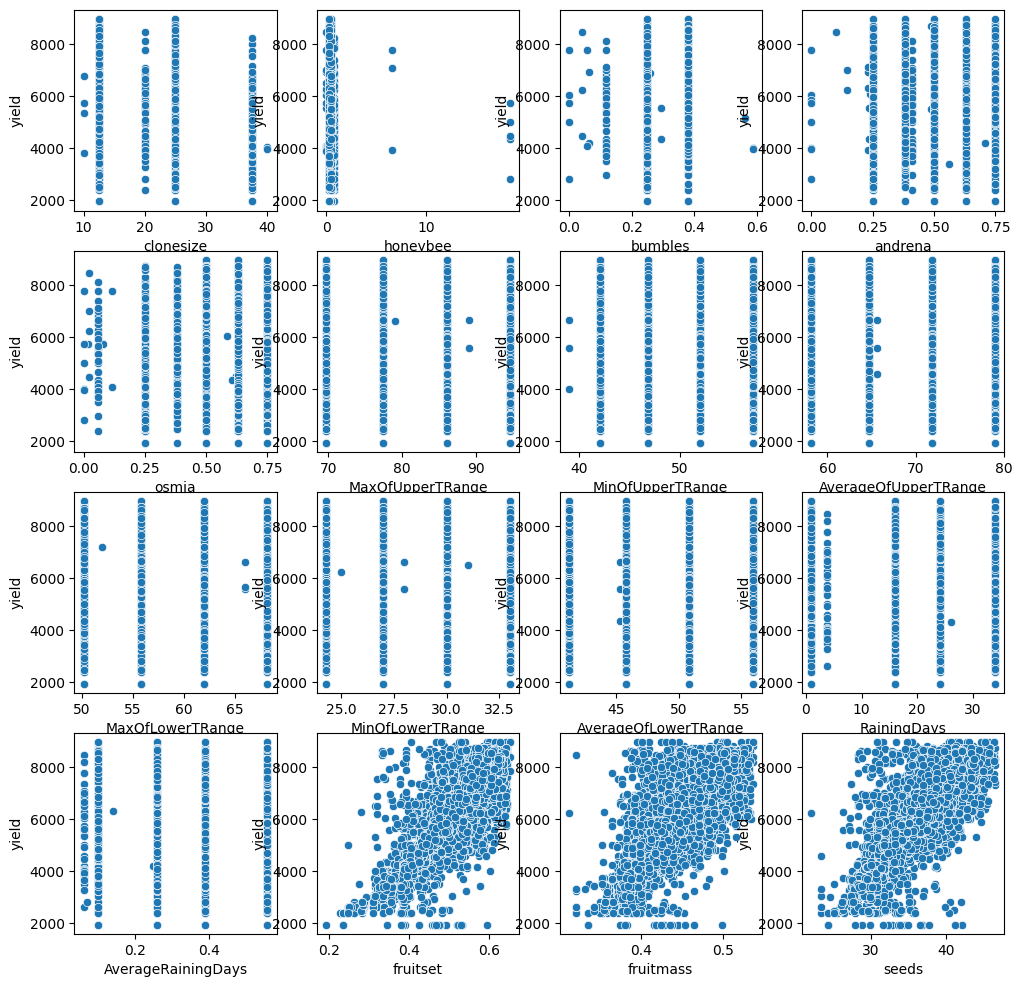

In [18]:
f,axes=plt.subplots(4,4,figsize=(12,12))
sns.scatterplot(x=df["clonesize"],y=df["yield"],ax=axes[0][0])
sns.scatterplot(x=df["honeybee"],y=df["yield"],ax=axes[0][1])
sns.scatterplot(x=df["bumbles"],y=df["yield"],ax=axes[0][2])
sns.scatterplot(x=df["andrena"],y=df["yield"],ax=axes[0][3])
sns.scatterplot(x=df["osmia"],y=df["yield"],ax=axes[1][0])
sns.scatterplot(x=df["MaxOfUpperTRange"],y=df["yield"],ax=axes[1][1])
sns.scatterplot(x=df["MinOfUpperTRange"],y=df["yield"],ax=axes[1][2])
sns.scatterplot(x=df["AverageOfUpperTRange"],y=df["yield"],ax=axes[1][3])
sns.scatterplot(x=df["MaxOfLowerTRange"],y=df["yield"],ax=axes[2][0])
sns.scatterplot(x=df["MinOfLowerTRange"],y=df["yield"],ax=axes[2][1])
sns.scatterplot(x=df["AverageOfLowerTRange"],y=df["yield"],ax=axes[2][2])
sns.scatterplot(x=df["RainingDays"],y=df["yield"],ax=axes[2][3])
sns.scatterplot(x=df["AverageRainingDays"],y=df["yield"],ax=axes[3][0])
sns.scatterplot(x=df["fruitset"],y=df["yield"],ax=axes[3][1])
sns.scatterplot(x=df["fruitmass"],y=df["yield"],ax=axes[3][2])
sns.scatterplot(x=df["seeds"],y=df["yield"],ax=axes[3][3])

## Outlier Removal using IQR


In [19]:
df2=df.copy()

In [20]:
percentile75=df2["clonesize"].describe()["75%"]
percentile25=df2["clonesize"].describe()["25%"]
iqr=percentile75-percentile25
upper_limit=percentile75+ 1.5*iqr
lower_limit=percentile25- 1.5*iqr

In [21]:
def IQR(column):
    percentile75=df2[f"{column}"].describe()["75%"]
    percentile25=df2[f"{column}"].describe()["25%"]
    iqr=percentile75-percentile25
    upper_limit=percentile75+ 1.5*iqr
    lower_limit=percentile25- 1.5*iqr
    print(f"Removing no.of Rows of {column}:")
    print(df2[(df2[f"{column}"]>upper_limit) | (df2[f"{column}"]<lower_limit)].shape[0])
    df2.drop(df2[(df2[f"{column}"]>upper_limit) | (df2[f"{column}"]<lower_limit)].index,axis=0,inplace=True)

In [22]:
columns_iqr=df2.drop(["yield"],axis=1).columns

In [23]:
#columns_iqr=df2.drop(["yield"],axis=1).columns

In [24]:
for column in columns_iqr:
    IQR(column)

Removing no.of Rows of clonesize:
0
Removing no.of Rows of honeybee:
8
Removing no.of Rows of bumbles:
5
Removing no.of Rows of andrena:
1
Removing no.of Rows of osmia:
46
Removing no.of Rows of MaxOfUpperTRange:
0
Removing no.of Rows of MinOfUpperTRange:
0
Removing no.of Rows of AverageOfUpperTRange:
0
Removing no.of Rows of MaxOfLowerTRange:
0
Removing no.of Rows of MinOfLowerTRange:
0
Removing no.of Rows of AverageOfLowerTRange:
0
Removing no.of Rows of RainingDays:
3533
Removing no.of Rows of AverageRainingDays:
0
Removing no.of Rows of fruitset:
89
Removing no.of Rows of fruitmass:
5
Removing no.of Rows of seeds:
12


In [25]:
print(f"No.of outliers detected by IQR = {df.shape[0]-df2.shape[0]}")

No.of outliers detected by IQR = 3699


<Axes: xlabel='fruitmass', ylabel='Density'>

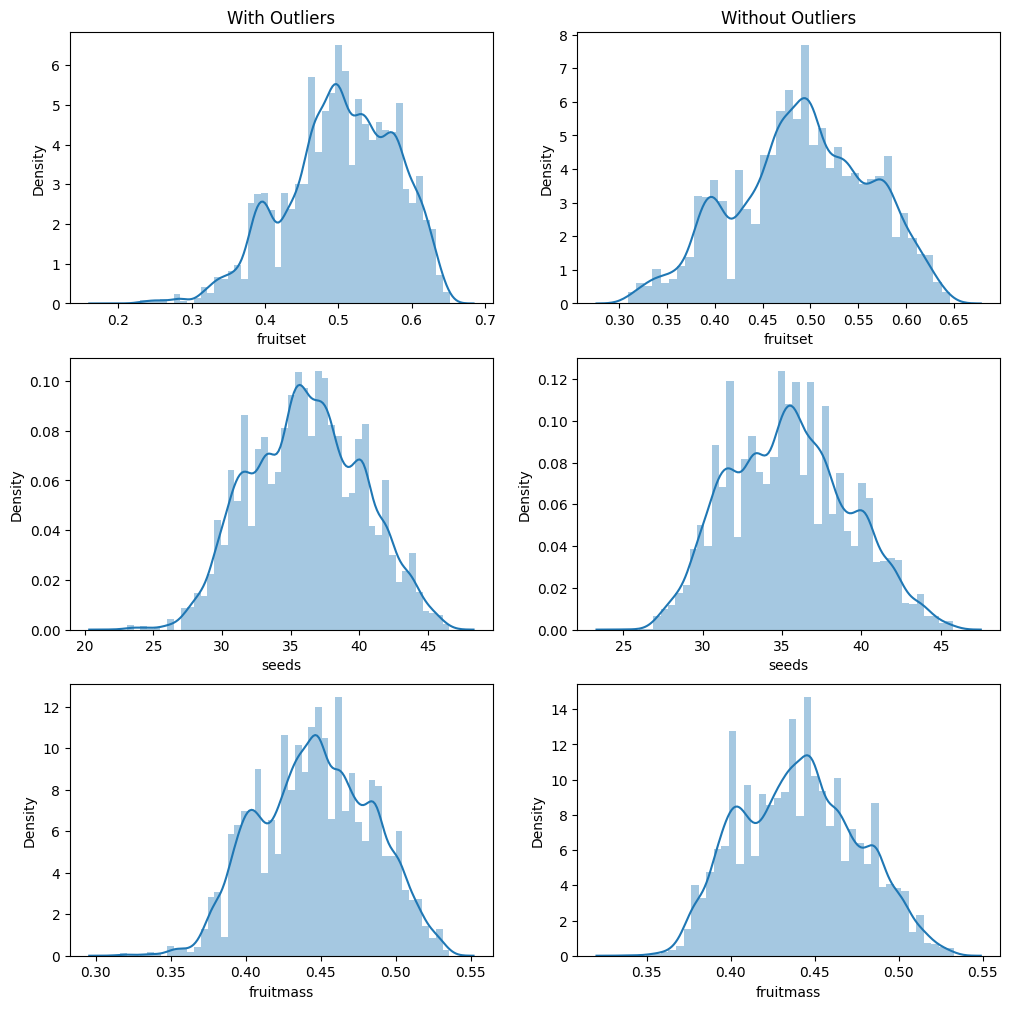

In [26]:
f,axes=plt.subplots(3,2,figsize=(12,12))
sns.distplot(df["fruitset"],ax=axes[0][0])
axes[0, 0].set_title("With Outliers")
axes[0, 1].set_title("Without Outliers")
sns.distplot(df2["fruitset"],ax=axes[0][1])
sns.distplot(df["seeds"],ax=axes[1][0])
sns.distplot(df2["seeds"],ax=axes[1][1])
sns.distplot(df["fruitmass"],ax=axes[2][0])
sns.distplot(df2["fruitmass"],ax=axes[2][1])

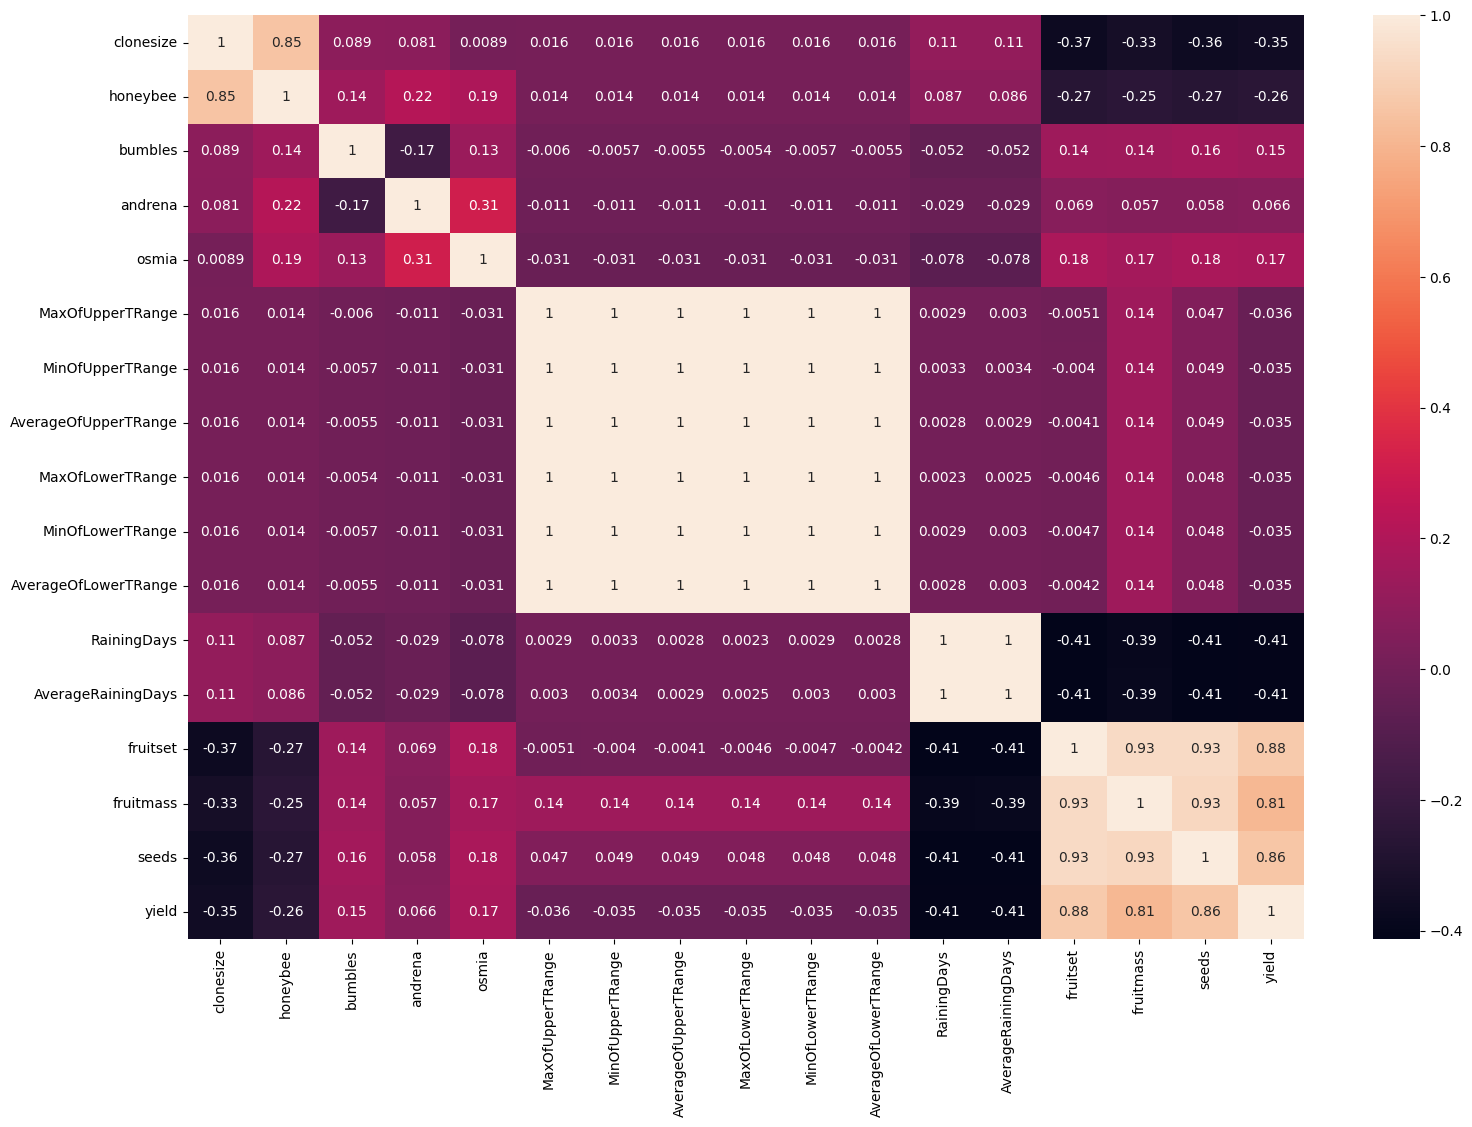

In [27]:
plt.figure(figsize=(18,12))
cor=df2.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [28]:
def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of Correlated Columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
corr_list=correlation(df2.drop("yield",axis=1),0.7)

In [30]:
corr_list

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'fruitmass',
 'honeybee',
 'seeds'}

In [31]:
#df2.drop(corr_list,axis=1,inplace=True)

## Feature Scaling

In [32]:
df2["RangeOfUpperTRange"]=df2["MaxOfUpperTRange"]-df2["MinOfUpperTRange"]
df2["RangeOfLowerTRange"]=df2["MaxOfLowerTRange"]-df2["MinOfLowerTRange"]

In [33]:
test["RangeOfUpperTRange"]=test["MaxOfUpperTRange"]-test["MinOfUpperTRange"]
test["RangeOfLowerTRange"]=test["MaxOfLowerTRange"]-test["MinOfLowerTRange"]

In [34]:
df2.drop(["MaxOfUpperTRange","MinOfUpperTRange"],axis=1,inplace=True)
test.drop(["MaxOfUpperTRange","MinOfUpperTRange"],axis=1,inplace=True)

In [35]:
df2.drop(["MaxOfLowerTRange","MinOfLowerTRange"],axis=1,inplace=True)
test.drop(["MaxOfLowerTRange","MinOfLowerTRange"],axis=1,inplace=True)

In [36]:
df2.drop(["RainingDays"],axis=1,inplace=True)
test.drop(["RainingDays"],axis=1,inplace=True)

In [37]:
X=df2.drop("yield",axis=1)
y=df2["yield"]

In [38]:
ss=StandardScaler()

In [39]:
X_columns=X.columns
test_columns=test.columns

In [40]:
X=pd.DataFrame(ss.fit_transform(X))

In [41]:
test=pd.DataFrame(ss.fit_transform(test))

In [42]:
X.columns=X_columns

In [43]:
test.columns=test_columns

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

## To Do Later

4. Correlation
5. PCA(Many Correleation features)
6. RainingDays, Avgrainingdays
7. Ways to transform data
8. Feature Selection

## Feature selection using Trees

In [52]:
from sklearn.feature_selection import SelectFromModel

In [53]:
rf=RandomForestRegressor(100)
rf=rf.fit(X, y)

In [54]:
rf.feature_importances_

array([0.00442412, 0.00378432, 0.00480125, 0.01215844, 0.01133366,
       0.00403974, 0.00389671, 0.01146391, 0.52130884, 0.04672709,
       0.36809023, 0.00407472, 0.00389696])

In [55]:
model = SelectFromModel(rf, prefit=True)

In [56]:
#X_new = model.transform(X)

## Feature selection using Forward Embed Method

In [ ]:
!pip install mlxtend

In [61]:
import joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs1 = SFS(
           LinearRegression(),
           k_features='best',
           forward=True,
           floating=False,
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

#sfs1 = sfs1.fit(X, y)

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
#forward_selection(X,y)

## Feature selection using select kbest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
for i in range(1,14):
    k = i
    X_new = SelectKBest(f_regression, k=k).fit_transform(X, y)
    selected_features = X.columns[SelectKBest(f_regression, k=k).fit(X, y).get_support()]
    #print(selected_features)
    X_new=X[selected_features]
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.20,random_state=7)
    xgb=XGBRegressor()
    params={"n_estimators":[100,150,200,250,300],'max_depth': [1,2,3,4]}
    grid=GridSearchCV(xgb,params,cv=5)
    #grid.fit(X_train,y_train)
    #xgb_predictions=grid.predict(X_test)
    #print(mae(xgb_predictions,y_test))

## Model Building

In [47]:
from sklearn.metrics import mean_absolute_error as mae

In [49]:
from sklearn.decomposition import PCA
for i in range(1,13):
    pca=PCA(n_components=i)
    X_train_pca=pca.fit_transform(X_train)
    X_test_pca=pca.transform(X_test)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    lr_predictions=lr.predict(X_test)
    print(mae(lr_predictions,y_test))


362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734
362.87677982816734


In [50]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
pred=model.predict(X_test)
mae(pred,y_test)

362.4766473073752

In [51]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
pred=model.predict(X_test)
mae(pred,y_test)

362.81646604747925

In [52]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_predictions=lr.predict(X_test)
mae(lr_predictions,y_test)

362.87677982816734

In [53]:
svm=SVR()
params={"kernel":['linear', 'rbf'],"C":[0.25,0.5,1,1.5,2]}
grid=GridSearchCV(svm,params,cv=5)
grid.fit(X_train,y_train)
svm_predictions=grid.predict(X_test)
mae(svm_predictions,y_test)

362.5687481959027

In [54]:
rf=RandomForestRegressor()
params={"n_estimators":[100,200,300,400,500,600],"max_features":[1,2,3,4,5,6],"bootstrap":[True]}
grid=GridSearchCV(rf,params,cv=5)
grid.fit(X_train,y_train)
rf_predictions=grid.predict(X_test)
mae(rf_predictions,y_test)

355.25329914010234

In [55]:
xgb=XGBRegressor()
params={"n_estimators":[100,200,300,400],'max_depth': [1,2,3,4]}
grid=GridSearchCV(xgb,params,cv=5)
grid.fit(X_train,y_train)
xgb_predictions=grid.predict(X_test)
mae(xgb_predictions,y_test)

351.3540071422023

In [56]:
grid.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [57]:
param_grid = {
      'learning_rate': [0.1, 0.01],
      'n_estimators': [100,200,300,400],
      'max_depth': [4, 6],
      'colsample_bytree': [0.7, 0.8, 0.9],
      'subsample': [0.7, 0.8, 0.9],
      'min_child_samples': [1, 5, 10]}

In [58]:
estimator = lgb.LGBMRegressor(objective='regression',random_state=1)
model = GridSearchCV(estimator=estimator,
                       param_grid=param_grid,
                       cv=12,
                       n_jobs=-1)

In [59]:
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [60]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [61]:
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 1.3924e+06	valid_0's l1: 955.627
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 1.19798e+06	valid_0's l1: 881.675
[3]	valid_0's l2: 1.03919e+06	valid_0's l1: 816.107
[4]	valid_0's l2: 909217	valid_0's l1: 758.087
[5]	valid_0's l2: 804232	valid_0's l1: 707.41
[6]	valid_0's l2: 718401	valid_0's l1: 662.196
[7]	valid_0's l2: 648611	valid_0's l1: 622.517
[8]	valid_0's l2: 592122	valid_0's l1: 588.095
[9]	valid_0's l2: 545899	valid_0's l1: 557.526
[10]	valid_0's l2: 508120	valid_0's l1: 530.475
[11]	valid_0's l2: 477319	valid_0's l1: 506.852
[12]	valid_0's l2: 451651	valid_0's l1: 485.779
[13]	valid_0's l2: 430424	valid_0's l1: 467.12
[14]	valid_0's l2: 413071	valid_0's l1: 450.666
[15]	valid_0's l2: 399053	valid_0's l1: 436.673
[16]	valid_0's l2: 387327	valid_0's l1: 424.274
[17]	valid_0's l2: 377745	valid_0's l1: 413.683
[18]	valid_0's l2: 369709	valid_0's l1: 404.499
[19]	valid_0's l2:

In [62]:
y_pred = model.predict(X_test)

In [63]:
mae(y_pred,y_test)

345.5152952884656

In [64]:
lgb_test = lgb.Dataset(test)

In [65]:
predictions=model.predict(test)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

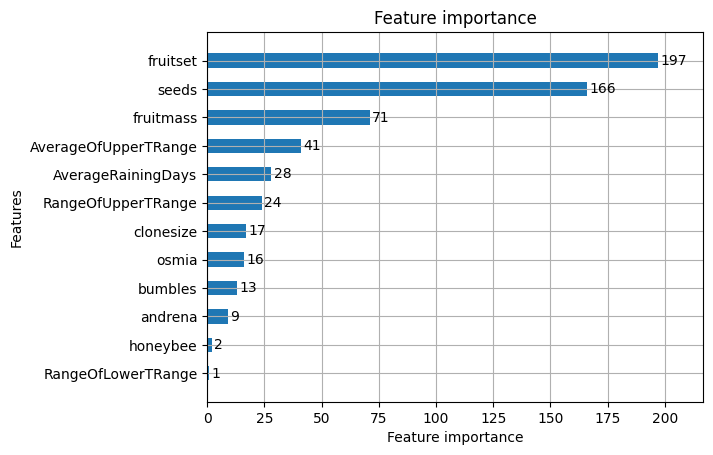

In [66]:
lgb.plot_importance(model, height=.5)

In [67]:
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]})

In [68]:
predictions=grid.predict(test)

In [69]:
submission=pd.DataFrame(predictions,columns=["yield"])

In [70]:
temp=pd.read_csv("test.csv")

In [71]:
submission["id"]=temp["id"]

In [72]:
submission=submission.iloc[:,::-1]

In [73]:
submission.to_csv("submission11.csv",index=False)

## Using Neural Networks

In [74]:
X_train_numpy=X_train.to_numpy()
X_test_numpy=X_test.to_numpy()
y_train_numpy=y_train.to_numpy()
y_test_numpy=y_test.to_numpy()

In [87]:
X_train_tensor=torch.from_numpy(X_train_numpy).type(torch.float).to("cuda")
y_train_tensor=torch.from_numpy(y_train_numpy).type(torch.float).to("cuda")
X_test_tensor=torch.from_numpy(X_test_numpy).type(torch.float).to("cuda")
y_test_tensor=torch.from_numpy(y_test_numpy).type(torch.float).to("cuda")

In [88]:
model=nn.Sequential(nn.Linear(in_features=13,out_features=64),
                    nn.LeakyReLU(),
                    nn.Linear(in_features=64,out_features=128),
                    nn.LeakyReLU(),
                    nn.Linear(in_features=128,out_features=128),
                    nn.LeakyReLU(),
                    nn.Linear(in_features=128,out_features=128),
                    nn.LeakyReLU(),
                    nn.Linear(in_features=128,out_features=128),
                    nn.LeakyReLU(),
                    nn.Linear(in_features=128,out_features=128),
                    nn.LeakyReLU(),
                    nn.Linear(in_features=128,out_features=1),
                    nn.LeakyReLU()
                    ).to("cuda")

In [89]:
# Create loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(),
                            lr=0.01)

In [ ]:
  # Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100


for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass
    y_pred = model(X_train_tensor)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_pred,y_train_tensor)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test_tensor)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_pred, y_test_tensor)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")